# ML Classification`KNN` Startup File

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |20 July 2023| Ken Dizon | Initial version

**Objective**

Write a startup ML script for Classification using KNN.

### Algorithms
Classification | 
:---------:|
DT, naive bayes, KNN, logistic, NN, SVM |
______________________
#### Content
1. **Load data**
    * 1.1 Data Exploration
2. **Data Preprocessing**
    * 2.1 Cleaning
    * 2.2 Missing Data
    * 2.3 Scaling
3. **Split - Test & Train**
4. **Model Selection**
5. **Model Training**
5. **Model Evaluation**

### Libraries

In [1]:
try:
    import numpy as np #math library 
    import scipy #computation
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    from sklearn import preprocessing #algorithims
    '''machine learning library'''
    
    print('https://scikit-learn.org/stable/')
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

https://scikit-learn.org/stable/
Libraries imported successfully!


_________
# [1] Load Data

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'

In [3]:
# Load
try:
    df = pd.read_csv(filepath)
    print("Data imported successfully!")
except ImportError:
    print("Data not installed. Please Load Data.")
# take a look at the dataset
df.head()

Data imported successfully!


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## 1.1 Data Exploration

In [4]:
df.shape

(1000, 12)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
# y: target 
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

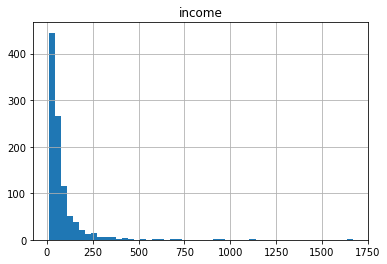

In [7]:
_ = df.hist(column='income', bins=50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


**scikit-learn library, we have to convert the Pandas data frame to a Numpy array:**

In [9]:
# Attributes
X = df[['region', 'tenure','age', 'marital', 'address', 'income',
        'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

_____
# [2] Data Preprocessing 
**NOTE:** As this is already a refined dataset we skip steps
- Cleaning
- Missing data
- Scaling
_____
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# [3] Creating train and test dataset
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


_______
# [4] Model Selection

### KNN K-Nearest-Neighbours
1. pick a value for K.
2. calculate the distance from the new case hold out from each of the cases in the dataset. 
3. search for the K-observations in the training data that are nearest to the measurements of the unknown data point.
4. predict the response of the unknown data point using the most popular response value from the K-Nearest Neighbors.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### 4.1 Pick a value for K

In [27]:
k = int(input('K=')) 

K= 4


_______
# [5] Model Training

In [28]:
#Train
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [29]:
# Prediction
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4])

____
# [6] Model Evaluation

In [30]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


____________
# Finding the best `K`

In [39]:
Ks = int(input('K max range=')) 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

K max range= 20


array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ,
       0.32 , 0.345, 0.33 , 0.32 , 0.34 , 0.355, 0.32 , 0.335, 0.34 ,
       0.355])

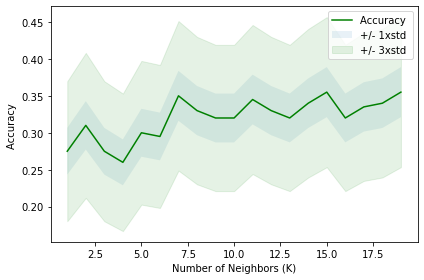

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7
